In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 18,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [3]:
colors = ["tab:blue", "tab:orange","tab:green","tab:purple","tab:brown","tab:pink","tab:cyan"]

In [4]:
# df_jpeg_time = pd.read_csv("../measurements/jpeg_per_frame/time.csv")
# df_jpeg_cha = pd.read_csv("../measurements/jpeg_per_frame/characteristic.csv")

# df_decom_time = pd.read_csv("../measurements/decomposition_per_frame/time.csv")
# df_decom_cha = pd.read_csv("../measurements/decomposition_per_frame/characteristic.csv")

# df_reg_time = pd.read_csv("../measurements/regression_per_frame/time.csv")
# df_reg_cha = pd.read_csv("../measurements/regression_per_frame/characteristic.csv")

df_jpeg_time = pd.read_csv("../measurements_vidvrd/jpeg_small/time.csv")
df_jpeg_cha = pd.read_csv("../measurements_vidvrd/jpeg_small/characteristic.csv")

df_decom_time = pd.read_csv("../measurements_vidvrd/decomposition_small/time.csv")
df_decom_cha = pd.read_csv("../measurements_vidvrd/decomposition_small/characteristic.csv")

df_reg_time = pd.read_csv("../measurements_vidvrd/regression_small/time.csv")
df_reg_cha = pd.read_csv("../measurements_vidvrd/regression_small/characteristic.csv")

df_jpeg_time["datasize_est"] = df_jpeg_cha["datasize_est"]
df_decom_time["datasize_est"] = df_decom_cha["datasize_est"]
df_reg_time["datasize_est"] = df_reg_cha["datasize_est"]

df_jpeg_time = df_jpeg_time[df_jpeg_time["model_head_time"]<20]
df_decom_time = df_decom_time[df_decom_time["model_head_time"]<20]
df_reg_time = df_reg_time[df_reg_time["model_head_time"]<20]

In [ ]:
df_reg_time.head()

,pruning_thresh,quality,frame_id,model_head_time,model_tail_time,framework_head_time,framework_tail_time,framework_response_time,compression_time,decompression_time,overall_time,datasize_est
1,0.0,1,2,10.014208,11.363808,1.703296,0.052960,42.987808,145.641891,0.080608,232.453308,56754
2,0.0,1,3,9.921760,72.483391,2.225696,0.079872,104.920670,123.881119,0.124960,272.394104,56748
3,0.0,1,4,10.057952,12.451168,1.831232,0.049152,45.862370,142.199356,0.077824,230.553574,56726
4,0.0,1,5,9.974496,13.224864,1.782272,0.056192,45.601089,134.031326,0.087104,221.860794,56703
5,0.0,1,6,9.980992,4.562240,1.820320,0.050688,35.228958,131.489670,0.079488,209.466812,56693


In [6]:
df_decom_time.head()

,pruning_thresh,quality,frame_id,model_head_time,model_tail_time,framework_head_time,framework_tail_time,framework_response_time,compression_time,decompression_time,overall_time,datasize_est
1,0.0,2,2,12.698400,4.561824,1.527488,0.037568,58.368130,2616.165283,0.068288,3488.680908,10088
2,0.0,2,3,9.993184,4.553792,1.147072,0.037728,52.057758,2528.163574,0.068160,3504.659180,8736
3,0.0,2,4,9.900672,4.557760,1.435040,0.038272,52.653023,2307.122559,0.067360,3263.098633,8736
4,0.0,2,5,9.945344,4.598688,1.504896,0.036608,52.897442,2405.499023,0.067328,3383.946777,8736
5,0.0,2,6,9.910144,4.627072,1.300128,0.037824,52.032738,2340.354004,0.068512,3288.220459,8736


In [7]:
df_reg_time.head()

,pruning_thresh,quality,frame_id,model_head_time,model_tail_time,framework_head_time,framework_tail_time,framework_response_time,compression_time,decompression_time,overall_time,datasize_est
1,0.0,1,2,10.014208,11.363808,1.703296,0.052960,42.987808,145.641891,0.080608,232.453308,56754
2,0.0,1,3,9.921760,72.483391,2.225696,0.079872,104.920670,123.881119,0.124960,272.394104,56748
3,0.0,1,4,10.057952,12.451168,1.831232,0.049152,45.862370,142.199356,0.077824,230.553574,56726
4,0.0,1,5,9.974496,13.224864,1.782272,0.056192,45.601089,134.031326,0.087104,221.860794,56703
5,0.0,1,6,9.980992,4.562240,1.820320,0.050688,35.228958,131.489670,0.079488,209.466812,56693


In [8]:
df_group = df_jpeg_time.groupby("pruning_thresh")
datasize_jpeg = []
cmp_time_jpeg = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_jpeg.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        cmp_time_jpeg.append((conf_g["compression_time"]+conf_g["decompression_time"]).to_numpy().mean())

df_group = df_decom_time.groupby("pruning_thresh")
datasize_decom = []
cmp_time_decom = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_decom.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        cmp_time_decom.append((conf_g["compression_time"]+conf_g["decompression_time"]).to_numpy().mean()/32)

df_group = df_reg_time.groupby("pruning_thresh")
datasize_reg = []
cmp_time_reg = []
for k1 in df_group.groups.keys():
    group = df_group.get_group(k1)
    groups_2 = group.groupby("quality")
    for k2 in groups_2.groups.keys():
        conf_g = groups_2.get_group(k2)
        datasize_reg.append(conf_g["datasize_est"].to_numpy().mean()/1000)
        cmp_time_reg.append((conf_g["compression_time"]+conf_g["decompression_time"]).to_numpy().mean())

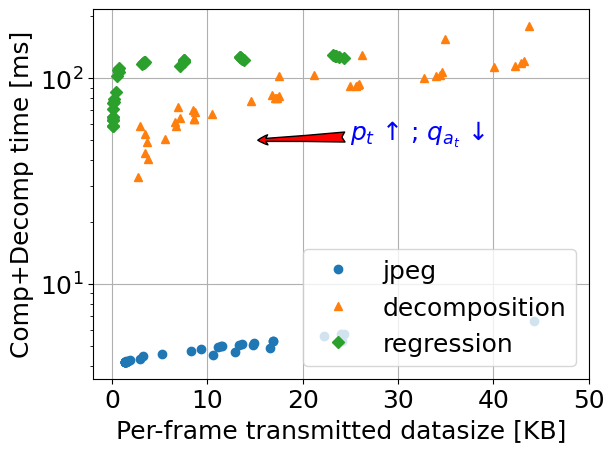

In [11]:
plt.figure()
plt.plot(datasize_jpeg, cmp_time_jpeg,"o",color=colors[0], label="jpeg")
plt.plot(datasize_decom, cmp_time_decom,"^",color=colors[1], label="decomposition")
plt.plot(datasize_reg, cmp_time_reg,"D",color=colors[2], label="regression")
# no_split_map_30 = 0.524
# plt.scatter(0,no_split_map_30*100,200,marker="*",color=colors[3],label="No split")

plt.annotate(
    '$p_t$ ↑ ; $q_{a_t}$ ↓', 
    xy=(15, 50), 
    xytext=(25, 50), 
    arrowprops=dict(facecolor='red', arrowstyle='fancy'),
    color='blue',
)

plt.yscale("log")
plt.legend(loc="lower right")
plt.xlim([-2,50])
plt.grid()
plt.xlabel("Per-frame transmitted datasize [KB]")
plt.ylabel("Comp+Decomp time [ms]")
plt.savefig("../figures/cmp_time_vs_datasize.pdf", bbox_inches='tight')